<a href="https://colab.research.google.com/github/JihyeonP/AI06_Section1_Project1/blob/main/n211a_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [1]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [3]:
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x, 2)) # 소수점 둘째자리까지 표시 
corr_df

# 타겟인 Price와 sqft_living이 가장 상관관계가 높다. 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


In [4]:
corr5a = corr_df.sort_values('price', ascending=False).head(5) # Price 열 기준 상위 5개 행 추출하는 다른 방법 / 반대는 tail
corr5a['price'] # price 열만 확인하기 

# Price와 상관관계 계수가 높은 5개 변수 확인 

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
Name: price, dtype: float64

### **참조) 전체 변수간의 상관관계 시각화하는 방법들 시도**

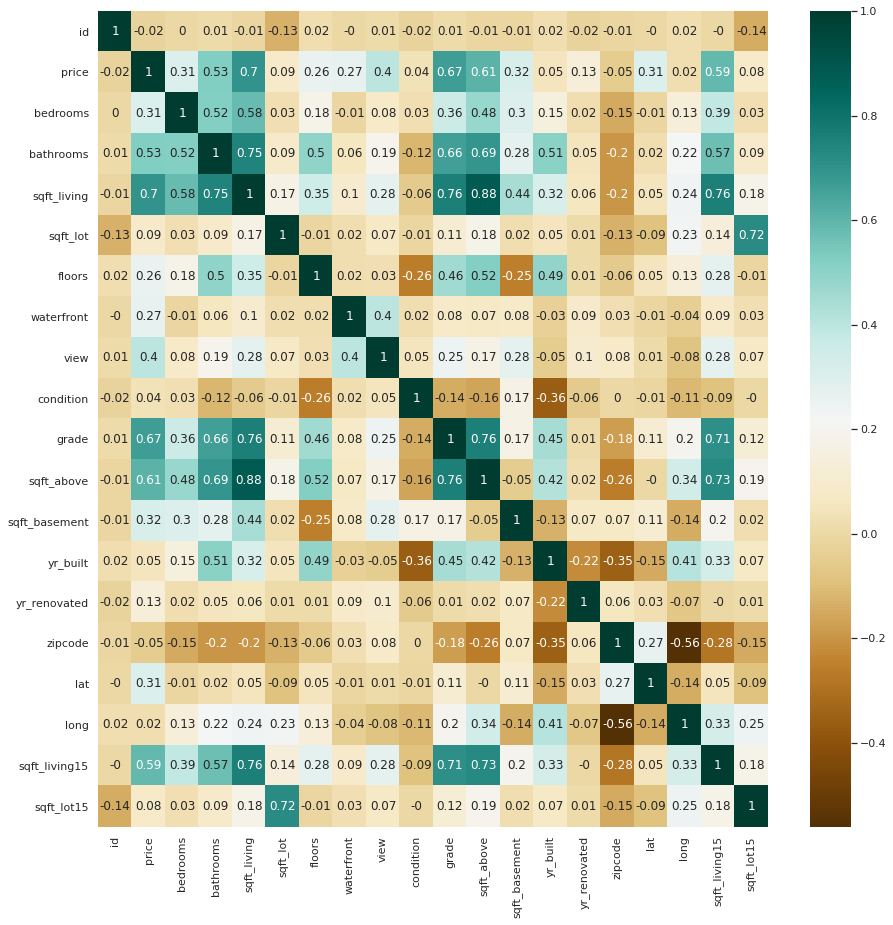

In [5]:
# 변수간의 상관관계 시각화 방법 1 
sns.set(rc = {'figure.figsize' : (15,15)})
df_heatmap = sns.heatmap(corr_df, annot=True, cmap='BrBG')

df_heatmap 

In [6]:
# 상관관계 값들을 SERIES 형태로 표현하기 
list = corr_df.unstack()
list

id          id               1.00
            price           -0.02
            bedrooms         0.00
            bathrooms        0.01
            sqft_living     -0.01
                             ... 
sqft_lot15  zipcode         -0.15
            lat             -0.09
            long             0.25
            sqft_living15    0.18
            sqft_lot15       1.00
Length: 400, dtype: float64

In [7]:
# 변수간의 상관관계 시각화 방법 2
# df2 = pd.DataFrame(list[list<1].sort_values(ascending=False), columns=['corr']) # Series를 DataFrame으로 변경 
# df2.style.background_gradient(cmap = 'viridis') # 출력 데이터를 시각화 

In [8]:
corr5 = corr_df.nlargest(5, 'price') # Price 열 기준 상위 5개 행 추출 / 반대는 nsmallest
corr5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
grade,0.01,0.67,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12
sqft_above,-0.01,0.61,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,-0.05,0.42,0.02,-0.26,-0.00,0.34,0.73,0.19
sqft_living15,-0.00,0.59,0.39,0.57,0.76,0.14,0.28,0.09,0.28,-0.09,0.71,0.73,0.20,0.33,-0.00,-0.28,0.05,0.33,1.00,0.18


In [9]:
corr5a = corr_df.sort_values('price', ascending=False).head(5) # Price 열 기준 상위 5개 행 추출하는 다른 방법 / 반대는 tail
corr5a['price'] # price 열만 확인하기 

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
Name: price, dtype: float64

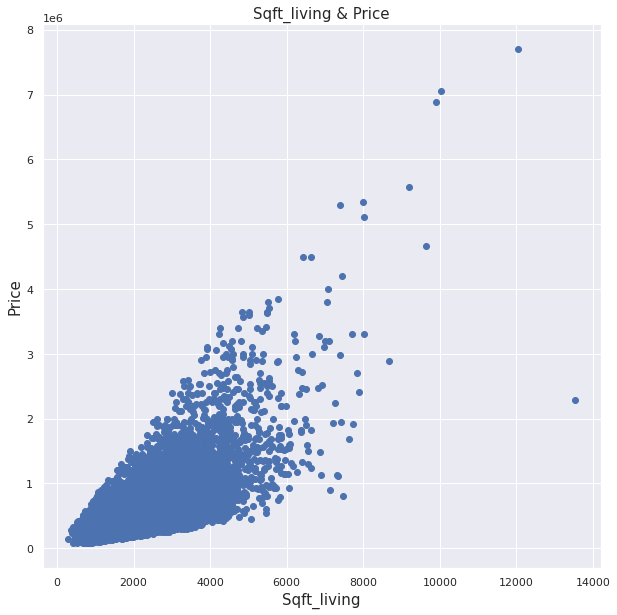

In [10]:
# 두 변수간의 관련성을 산점도로 살펴보기 (price와 sqft_living)
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize' : (10,10)})

x = df.sqft_living.values 
y = df.price.values 

plt.scatter(x, y)
plt.title('Sqft_living & Price', fontsize = 15)
plt.xlabel('Sqft_living', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

# 대략적으로 봤을때 양의 상관관계를 보임을 추측해볼 수 있음.

In [11]:
# numpy의 corrcoef()함수를 이용한 상관계수 산출 
np.corrcoef(x,y)[0,1]

## 약 0.8의 강한 상관관계를 가짐. 

0.7020350546118002

In [12]:
# 상관계수 검정 
import scipy.stats as stats 
stats.pearsonr(x,y)
# 귀무가설 : 상관관계가 없다. / p-value < 0.05 / 따라서 두 변수간의 상관관계가 있다고 볼 수 있음. 

(0.7020350546118002, 0.0)

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

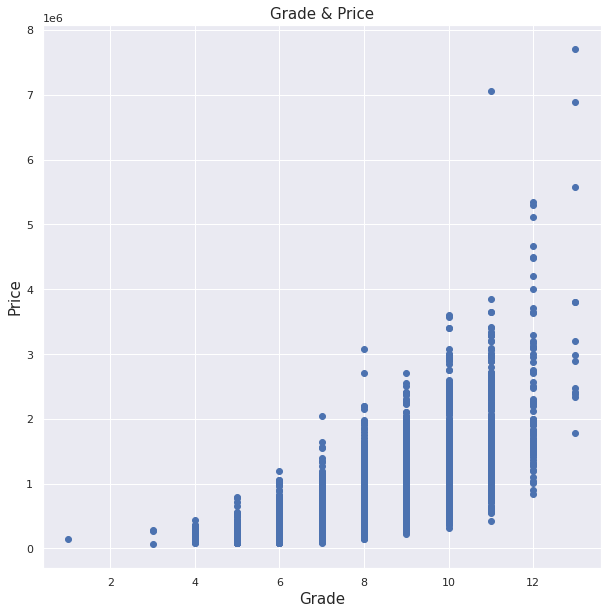

In [13]:
x1 = df.grade.values # 동일한 결과값 다른 표현 : x1 = df['grade'] 

# grade와 price의 scatter plot 
plt.scatter(x1, y)
plt.title('Grade & Price', fontsize = 15)
plt.xlabel('Grade', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

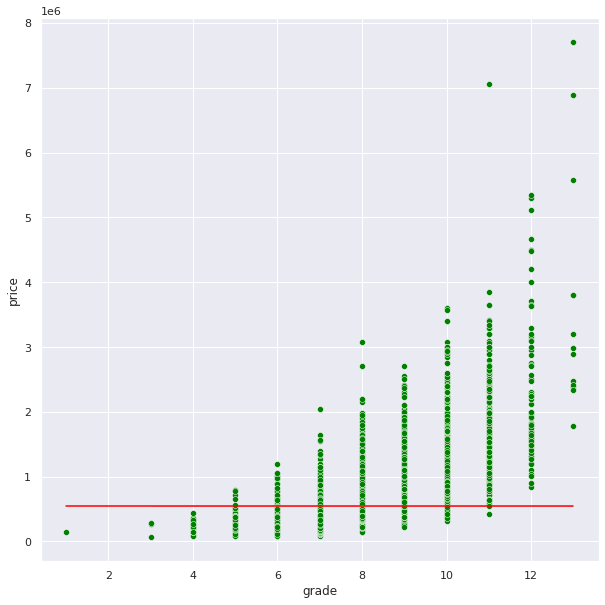

In [14]:
# grade와 price의 scatter plot 및 기준모델의 시각화 

x2 = df['grade']
y2 = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x2, y=predict, color='red')
sns.scatterplot(x=x2, y=y2, color='green')

In [15]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model1 = LinearRegression()

In [18]:
feature1 = ['grade']
target1 = ['price']
X_train1 = df[feature1] # X는 테이블 
y_train1 = df[target1] # y는 타겟 벡터 

In [19]:
model1.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
X_test1 = [[6]]
y_pred1 = model1.predict(X_test1)

print(f'{X_test1[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred1)}입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700입니다.


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [23]:
## 새로운 데이터는 3으로 설정 
X_test2 = [[3]]
y_pred2 = model1.predict(X_test2)

print(f'{X_test2[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred2)}입니다.')

3 grade를 가지는 주택의 예상 가격은 $-430672입니다.


In [24]:
## 회귀 계수 : unit 하나가 증가할 때마다 해당 값만큼 예측값이 증가함. 
model1.coef_
print(model1.coef_)

[[208457.56245838]]


In [25]:
## y절편 
model1.intercept_

array([-1056044.97700977])

In [26]:
## 예측함수 만들어보기 
def explain_prediction(grade):
    y_pred = model1.predict([[grade]])
    pred = f"{int(grade)} grade 주택 가격 예측 : ${int(y_pred[0])}(1 grade당 추가금: ${int(model1.coef_[0])})"
    return pred 

In [27]:
## grade = 30인 데이터로 예측해보기 
print(explain_prediction(30))

30 grade 주택 가격 예측 : $5197681(1 grade당 추가금: $208457)


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [28]:
## sqft_living과 price간의 예측모델 만들기. 
model2 = LinearRegression()

feature2 = ['sqft_living']
target2 = ['price']
X_train2 = df[feature2] 
y_train2 = df[target2]

In [29]:
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
X_test3 = [[1900]]
y_pred3 = model2.predict(X_test3)

print(f'{X_test3[0][0]} sqft living을 가지는 주택의 예상 가격은 ${int(y_pred3)}입니다.')

1900 sqft living을 가지는 주택의 예상 가격은 $489604입니다.


In [31]:
## sqft_living에 대한 회귀계수와 y절편 
print(model2.coef_)
print(model2.intercept_)

[[280.6235679]]
[-43580.74309447]


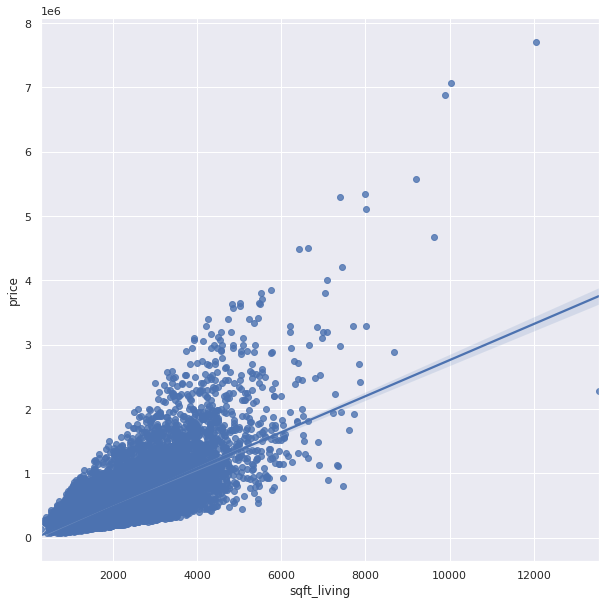

In [32]:
sns.regplot(x=df['sqft_living'], y=df['price'])

In [33]:
## 기존 모델 (grade)에 대한 회귀계수와 y절편 
print(model1.coef_)
print(model1.intercept_)

[[208457.56245838]]
[-1056044.97700977]


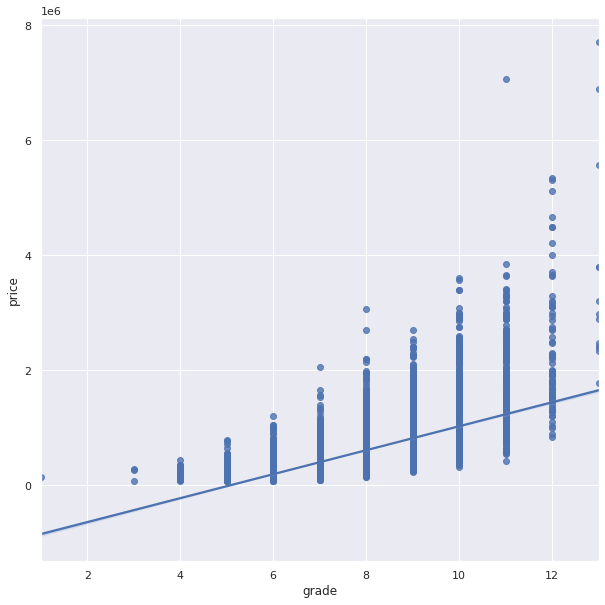

In [34]:
sns.regplot(x=df['grade'], y=df['price'])

In [35]:
## model1 (grade&price) 와 model2(sqft_living&price) 모두 positive한 상관관계를 보이며 이에 따라 회귀선이 오른쪽 위를 향한다. 

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [36]:
### 이곳에서 과제를 진행해 주세요 ###